In [11]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.spatial.transform import Rotation

In [12]:
work_dir = Path(r"D:\Work\2023\three_gorge")
sima_path = work_dir/"suyu_freedecay_data.csv"

In [13]:
sima_data_df = pd.read_csv(sima_path)
sima_data_df.head()

,Time [s],heave [m],roll [deg],pitch [deg]
0,0.0,3.682258,4.979211,4.809143
1,0.1,3.679563,4.976808,4.807217
2,0.2,3.668353,4.969272,4.802440
3,0.3,3.648300,4.956541,4.794720
4,0.4,3.619188,4.938879,4.784087


In [14]:
def get_euler_angles(df):
    orientation = df[['Rxx', 'Rxy','Rxz', 'Ryx', 'Ryy', 'Ryz', 'Rzx', 'Rzy', 'Rzz']].values
    R = np.reshape(orientation, (3, 3))
    roll = np.arctan2(R[2, 1], R[2, 2])
    pitch = np.arctan2(-R[2, 0], np.sqrt(R[2, 1]**2 + R[2, 2]**2))
    yaw = np.arctan2(R[1, 0], R[0, 0])
    roll_degrees = np.degrees(roll)
    pitch_degrees = np.degrees(pitch)+5
    yaw_degrees = np.degrees(yaw)
    return roll_degrees, pitch_degrees, yaw_degrees

In [26]:
def load_cfd_data(data_file, dir, write=False):
    """_summary_

    Args:
        data_file (WindowsPath): file name containing cfd data
        work_dir (WindowsPath): directory holding data
        write (bool, optional): Write our data or not. Defaults to False.
    """
    cfd_data_df = pd.read_csv(dir/data_file, sep="\s+",engine='python')
    cfd_data_df = cfd_data_df.iloc[0::3,:]
    # Get rid of spaces in the columns
    cfd_data_df.columns = cfd_data_df.columns.str.replace(" ", "")
    cfd_data_df[['Roll', 'Pitch', 'Yaw']] = cfd_data_df.apply(get_euler_angles, axis=1, result_type='expand') 
    cfd_data_df['Pitch'] = cfd_data_df["Pitch"]-cfd_data_df["Pitch"].mean()
    if write:
        cfd_data_df.to_csv(dir/"cfd_pitch.csv")  
    return cfd_data_df

In [34]:
pitch_dir = work_dir/"pitch"
refine_pitch_dir = work_dir/"refine_pitch"
pure_pitch_dir = work_dir/"purepitch"

In [35]:
pitch_df = load_cfd_data("RB_DATA.dat", pitch_dir)
refine_pitch_df = load_cfd_data("RB_DATA.dat", refine_pitch_dir)
pure_pitch_df = load_cfd_data("RB_DATA.dat", pure_pitch_dir)

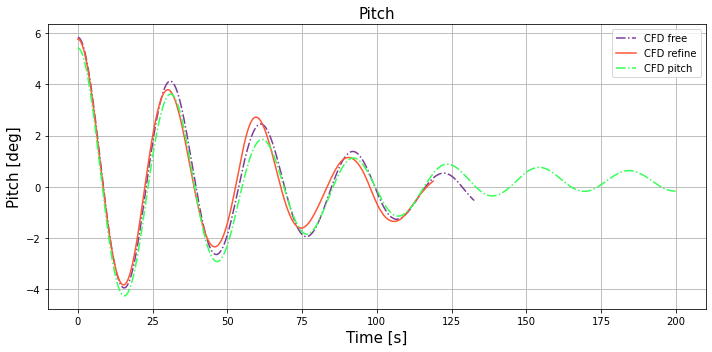

In [38]:
fig,ax = plt.subplots(figsize=(10,5))
# ax.plot(sima_data_df["Time [s]"],sima_data_df["pitch [deg]"], "-", color="#000000", fillstyle="none",markersize=12, label="Sima" )
ax.plot(pitch_df['Time'], pitch_df['Pitch'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD free")
ax.plot(refine_pitch_df['Time'], refine_pitch_df['Pitch'], "-", color="#FF5733",fillstyle="none",markersize=12,label="CFD refine")
ax.plot(pure_pitch_df['Time'], pure_pitch_df['Pitch'], "-.", color="#33FF55",fillstyle="none",markersize=12,label="CFD pitch")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Pitch [deg]", fontsize=15)
ax.set_title("Pitch", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"pitch_coarse_mesh.jpg", bbox_inches="tight", dpi=400)

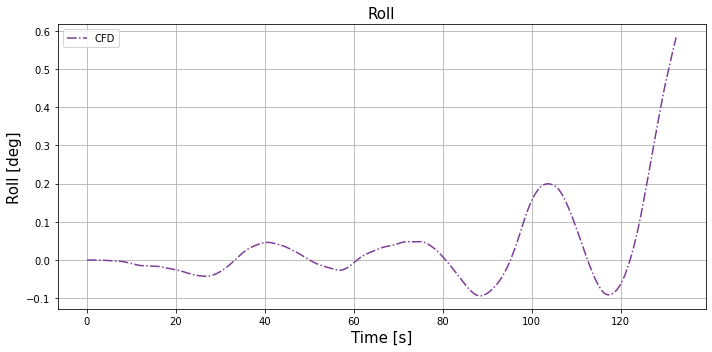

In [39]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(pitch_df['Time'], pitch_df['Roll'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Roll [deg]", fontsize=15)
ax.set_title("Roll", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"Roll.jpg", bbox_inches="tight", dpi=400)

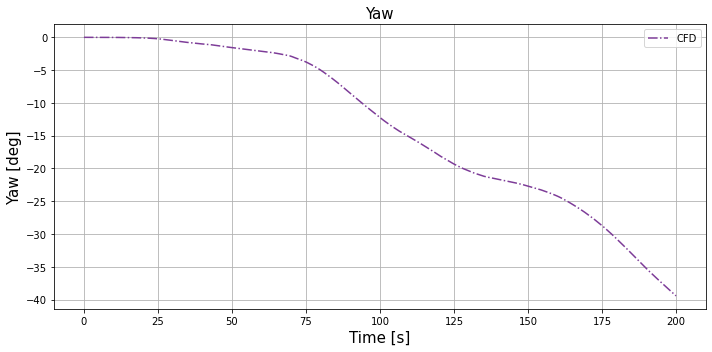

In [13]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(cfd_data_df['Time'], cfd_data_df['Yaw'], "-.", color="#7D3C98",fillstyle="none",markersize=12,label="CFD")
ax.legend()
ax.grid()
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel ("Yaw [deg]", fontsize=15)
ax.set_title("Yaw", fontsize=15)
fig.tight_layout()
plt.savefig(work_dir/"Yaw.jpg", bbox_inches="tight", dpi=400)